In [23]:
from nbdev.showdoc import *
from FRED.embed import *
from FRED.trainers import *
import torch
if torch.__version__[:4] == '1.13': # If using pytorch with MPS, use Apple silicon GPU acceleration
    device = torch.device("cuda" if torch.cuda.is_available() else 'mps' if torch.has_mps else "cpu")
else:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device", device)
%load_ext autoreload
%autoreload 2

Using device cuda
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initial Toy Dataset Experiments with FRED
> Here, we try to reproduce results of previous iterations of FRED (before it became FRED).

Set sigma =  0.06267175


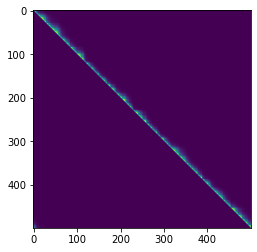

In [24]:
from FRED.datasets import directed_circle
from FRED.data_processing import dataloader_from_ndarray

X, flow, labels = directed_circle()
# build dataset
dataloader = dataloader_from_ndarray(X,flow,labels)

In [25]:
class CircleTrainer(Trainer):
    def __init__(self, dataloader, device = device):
        super().__init__(dataloader, device)
        self.vizfiz = [
            visualize_points
        ]
        self.loss_weights = {
            "reconstruction": 0,
            "diffusion map regularization": 1,
            "flow neighbor loss": 1e-4,
            "smoothness": 0,
        }
        self.FE = ManifoldFlowEmbedder(
            embedding_dimension=2,
            embedder_shape=[3, 4, 8, 4, 2],
            device=device,
            sigma=0.5,
            flow_strength=0.5,
            smoothness_grid=True,
        ).to(device)
        self.title = "Circle Trainer"

In [26]:
FRED = CircleTrainer(dataloader, device)

In [22]:
FRED.fit(100)

  0%|          | 0/100 [00:00<?, ?it/s]

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)